In [ ]:
from google.colab import drive
drive.mount('gdrive')
%cd /content/gdrive/'My Drive'/Dataset/Assignment5

Mounted at gdrive
/content/gdrive/My Drive/Dataset/Assignment5


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from mlxtend.plotting import plot_decision_regions

In [ ]:
# h= load_model('MNIST_Subset.h5')
import h5py
file = h5py.File('MNIST_Subset.h5', 'r')

In [ ]:
list(file.keys())
X1 = file['X']
Y1 = file['Y']
X= np.array(X1.value)
Y= np.array(Y1.value)
# print(X)
# print(Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

###b

In [ ]:
# Flatten the images
image_vector_size = 28*28
xtrain = xtrain.reshape(xtrain.shape[0], image_vector_size)
xtest = xtest.reshape(xtest.shape[0], image_vector_size)

In [ ]:
clf = MLPClassifier(activation = 'logistic', alpha=0.1, hidden_layer_sizes=(100, 50, 50), random_state=1)
clf.fit(xtrain, ytrain)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
clf.loss_

0.07377650735815246

In [ ]:
from sklearn.metrics import log_loss
probs = clf.predict_proba(xtest)
print(log_loss(ytest, probs))

0.05254654523933639


In [ ]:
print(clf.score(xtrain, ytrain)*100)
print(clf.score(xtest, ytest)*100)

98.82456140350877
98.28130480533146


In [ ]:
# log_loss(xtrain, ytrain)
# print(log_loss(xtest, ytest)*100))

## C


In [ ]:
standardized_data = StandardScaler().fit_transform(xtrain)
standardized_data.shape

model = TSNE(n_components=2, random_state=0)
tsne_data2 = model.fit_transform(standardized_data)

In [ ]:
print(tsne_data2)

[[-14.190116  -59.049397 ]
 [-19.144842   25.491404 ]
 [ 43.499596   44.37874  ]
 ...
 [ 30.907724  -22.540337 ]
 [-71.05652    -3.9883237]
 [-39.76784    46.9701   ]]


In [ ]:
print(np.unique(Y))
ypred = clf.predict(xtrain)

[7 9]


### Alpha : 0.00001

In [ ]:
clf = MLPClassifier(activation = 'logistic', alpha=0.00001, hidden_layer_sizes=(100, 50, 50), random_state=1)
clf.fit(tsne_data2, ytrain)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
ypred = clf.predict(tsne_data2)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


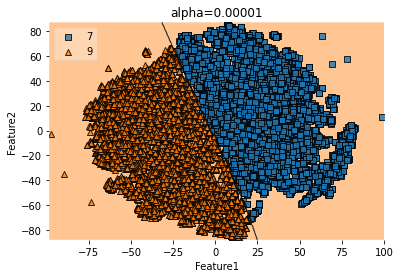

In [ ]:
# Plotting decision regions
plot_decision_regions(tsne_data2, ypred, clf=clf, legend=2)

# Adding axes annotations
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('alpha=0.00001')

plt.show()

### Alpha : 0.1

In [ ]:
clf2 = MLPClassifier(activation = 'logistic', alpha=0.1, hidden_layer_sizes=(100, 50, 50), random_state=1)
clf2.fit(tsne_data2, ytrain)

MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
ypred = clf2.predict(tsne_data2)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


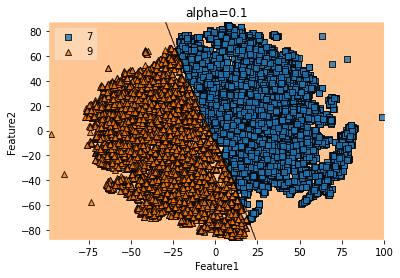

In [ ]:
# Plotting decision regions
plot_decision_regions(tsne_data2, ypred, clf=clf2, legend=2)

# Adding axes annotations
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('alpha=0.1')

plt.show()

### Alpha : 10

In [ ]:
clf3 = MLPClassifier(activation = 'logistic', alpha=10, hidden_layer_sizes=(100, 50, 50), random_state=1)
clf3.fit(tsne_data2, ytrain)

MLPClassifier(activation='logistic', alpha=10, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
ypred = clf3.predict(tsne_data2)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


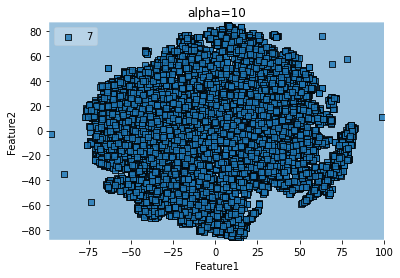

In [ ]:
# Plotting decision regions
plot_decision_regions(tsne_data2, ypred, clf=clf3, legend=2)

# Adding axes annotations
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('alpha=10')

plt.show()